Name : Fredrick Joel F

Roll No : 235229106

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Importing the libraries
import cv2
import numpy as np
# Reading the image and converting the image to B/W
image = cv2.imread('/content/drive/MyDrive/DL Lab/Week3/images.jpeg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = np.float32(gray_image)
# Applying the function
dst = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)
# dilate to mark the corners
dst = cv2.dilate(dst, None)
image[dst > 0.01 * dst.max()] = [0, 255, 0]
cv2.imshow('haris_corner', image)
cv2.waitKey()

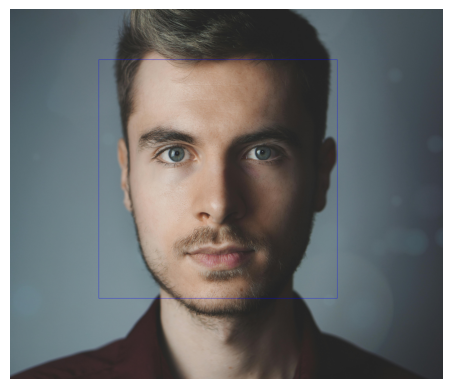

In [3]:
#Part1

import cv2
import matplotlib.pyplot as plt
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +
'haarcascade_frontalface_default.xml')
img = cv2.imread('/content/drive/MyDrive/DL Lab/Week3/face.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5,minSize=(30, 30))
for (x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

Height: 576
Width: 768
Channels: 3


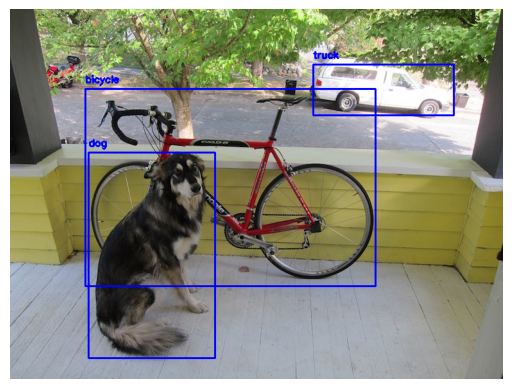

In [ ]:
#Part2

import cv2
import matplotlib.pyplot as plt
import numpy as np


net = cv2.dnn.readNet('/content/drive/MyDrive/DL Lab/Week3/yolov3.weights', '/content/drive/MyDrive/DL Lab/Week3/yolov3.cfg')
with open('/content/drive/MyDrive/DL Lab/Week3/coco.names', 'r') as f:
 classes = f.read().strip().split('\n')

image = cv2.imread('/content/drive/MyDrive/DL Lab/Week3/dog_bike_car.jpg')
if image is not None:
    # Get image dimensions
    height, width, channels = image.shape
    print(f"Height: {height}")
    print(f"Width: {width}")
    print(f"Channels: {channels}")  # Number of color channels (e.g., 3 for RGB)
else:
    print("Error: Image could not be loaded. Check the file path.")

blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
layer_names = net.getLayerNames()
output_layers_indices= net.getUnconnectedOutLayers()
output_layer = [layer_names[i - 1] for i in output_layers_indices]
outs = net.forward(output_layer)

class_ids = []
confidences = []
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)
      x = int(center_x - w / 2)
      y = int(center_y - h / 2)
      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0,0), 2)


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()